In [1]:
#!pip install networkx --user
import numpy as np
import networkx as nx
print("Networkx version: {}".format(nx.__version__))
from time import time
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set()

print("numpy version: {}".format(np.__version__))
print("Networkx version: {}".format(nx.__version__))

from scipy.stats import norm
import numexpr
numexpr.print_versions()
%matplotlib inline

Networkx version: 2.4
numpy version: 1.18.1
Networkx version: 2.4
*Warning*: NumPy version is lower than recommended: 1.18.1 < 1.7.0
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Numexpr version:   2.6.8
NumPy version:     1.18.1
Python version:    3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Platform:          linux-x86_64-#1 SMP Tue Aug 11 19:12:04 EDT 2020
CPU vendor:        
CPU model:         
CPU clock speed:    MHz
VML available?     True
VML/MKL version:   Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
Number of threads used by default: 8 (out of 64 detected cores)
Maximum number of threads: 64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [2]:
import tensorflow as tf
print(tf.__version__)

import os
print(os.environ['HOME'])
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

from tensorflow_probability import edward2 as ed
tfd = tfp.distributions

2.0.0
/u/yan30
Using a GPU


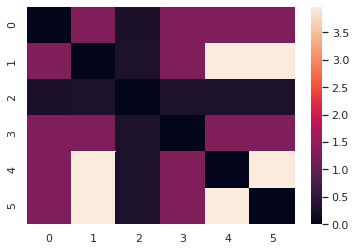

In [3]:
Gorig = nx.read_edgelist("data/resnik.txt", delimiter='\t' , nodetype=str,  data=(('weight',float),))
for u,v,d in Gorig.edges(data=True):
    Gorig[u][v]['weight']= Gorig[u][v]['weight'] + np.random.normal(0,0.001)
#H = Gorig.subgraph(['ACD', 'ABL1', 'ACTL6A', 'ACTR5', 'ACTR8', 'ALKBH1', 'ALKBH2', 'ALKBH3'])
#mapping = {'ACD':6, 'ABL1':3, 'ACTL6A':7, 'ACTR5':5, 'ACTR8':0, 'ALKBH1':1, 'ALKBH2':2, 'ALKBH3':4}
H = Gorig.subgraph(['ACD', 'ABL1', 'ACTL6A', 'ACTR5', 'ACTR8', 'ALKBH3'])
mapping = {'ACD':6, 'ABL1':3, 'ACTL6A':7, 'ACTR5':5, 'ACTR8':0, 'ALKBH3':4}
G0 = nx.relabel_nodes(H, mapping)
A = nx.adjacency_matrix(G0).todense()
ax = sns.heatmap(A)

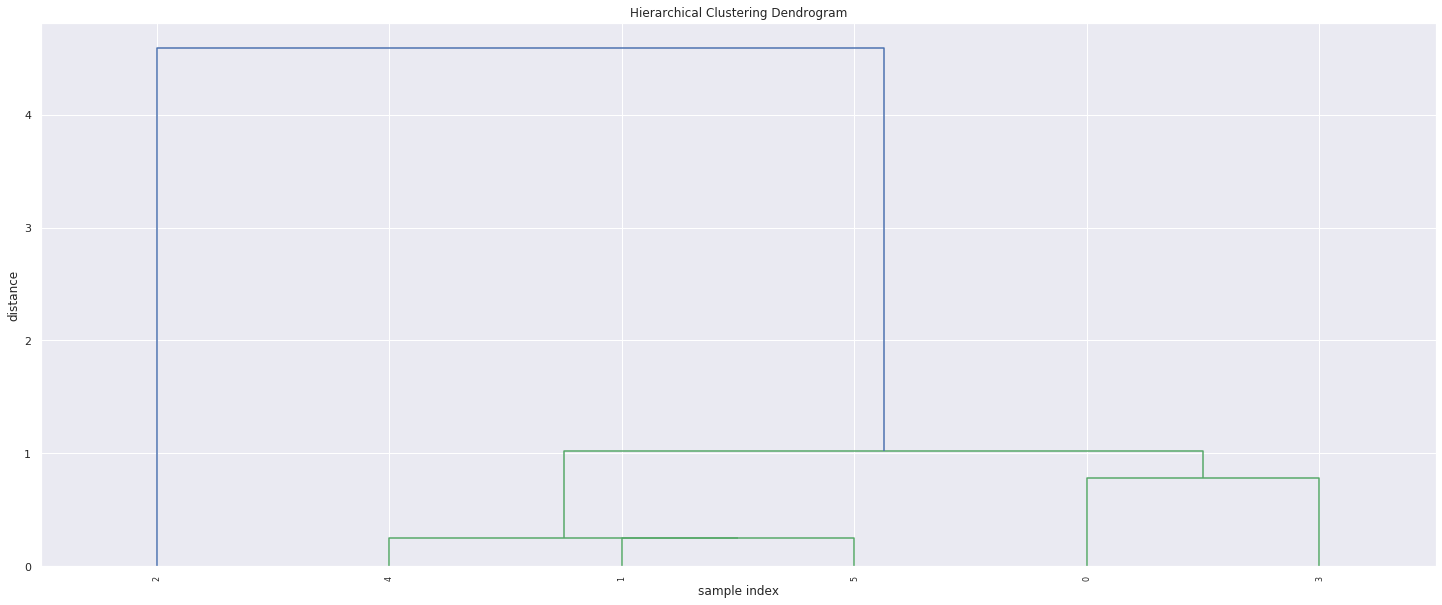

array([[1.        , 5.        , 0.25219545, 2.        ],
       [4.        , 6.        , 0.25226807, 3.        ],
       [0.        , 3.        , 0.78157076, 2.        ],
       [7.        , 8.        , 1.02373541, 5.        ],
       [2.        , 9.        , 4.58717223, 6.        ]])

In [265]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

for u,v,d in G0.edges(data=True):
    G0[u][v]['weight']= 1.0/G0[u][v]['weight']

A = nx.adjacency_matrix(G0).todense()    
listA = squareform(A)
Z = linkage(listA, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
Z

In [4]:
import networkx as nx
from networkx import relabel

Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term')
len(terms)

437

In [5]:
import pandas as pd

df = pd.read_csv('data/pearl2015.txt', sep='\t', header=None)
#df.to_csv('pdTest.csv')
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
genes = [u for u,v,e in Gref.edges(data=True) if e[2] == 'Gene-Term']
genes

['LIG1',
 'LIG1',
 'LIG1',
 'LIG1',
 'LIG3',
 'LIG3',
 'PARP1',
 'PARP1',
 'XRCC1',
 'XRCC1',
 'XRCC1',
 'APEX1',
 'APEX2',
 'AMN1',
 'BRCC3',
 'CCNA2',
 'CCNB2',
 'CCNB3',
 'CDKN1A',
 'CDKN1A',
 'MDC1',
 'MDC1',
 'PER1',
 'PER2',
 'PER3',
 'TP53BP1',
 'TP53BP1',
 'ACTL6A',
 'ACTR5',
 'ACTR8',
 'ARID1A',
 'ARID1B',
 'ARID2',
 'BAZ1A',
 'BRD7',
 'CHRAC1',
 'INO80',
 'INO80C',
 'INO80D',
 'INO80E',
 'MCRS1',
 'NFRKB',
 'PBRM1',
 'POLE3',
 'POLE3',
 'RUVBL1',
 'RUVBL2',
 'SMARCA2',
 'SMARCA4',
 'SMARCA5',
 'SMARCB1',
 'SMARCC1',
 'SMARCC2',
 'SMARCD1',
 'SMARCE1',
 'TFPT',
 'NCAPD2',
 'NCAPD3',
 'NCAPG',
 'NCAPH',
 'NCAPH2',
 'PDS5A',
 'PDS5B',
 'RAD21',
 'SMC1A',
 'SMC1B',
 'SMC2',
 'SMC3',
 'SMC4',
 'STAG1',
 'STAG2',
 'MMS22L',
 'TONSL',
 'ALKBH2',
 'ALKBH3',
 'MGMT',
 'CRY1',
 'CRY2',
 'MBD4',
 'MPG',
 'MUTYH',
 'NEIL1',
 'NEIL2',
 'NEIL3',
 'NTHL1',
 'OGG1',
 'SMUG1',
 'TDG',
 'UNG',
 'PCNA',
 'PCNA',
 'PCNA',
 'PCNA',
 'POLD1',
 'POLD1',
 'POLD2',
 'POLD2',
 'POLD3',
 'POLD3',
 'POL

In [6]:
def get_level(level):
    for child in Gref.nodes():
        if Gref.nodes[child]['level'] == level: #get all nodes at level
            newLevel = level
            for parent in Gref.successors(child): #get parents one level above
                newLevel = level+1
                if newLevel > Gref.nodes[parent]['level']: #check if the parent's level needs to be raised
                    Gref.nodes[parent]['level'] = newLevel
    return newLevel

for node in Gref.nodes():
    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
        Gref.nodes[node]['level'] = 0
    else: Gref.nodes[node]['level'] = -1
level = 0
newLevel = 0
while  newLevel == level:
    newLevel = get_level(level)
    level += 1
    print(newLevel)
        
sorted(Gref.nodes(data=True), key=lambda t: t[1].get('level', 1), reverse = True)

1
2
3
4
5
5


[('Repair pathway', {'level': 5}),
 ('Associated process', {'level': 4}),
 ('Telomere maintenance', {'level': 3}),
 ('Ubiquitin response', {'level': 3}),
 ('SSR', {'level': 3}),
 ('Alternative mechanism', {'level': 2}),
 ('Checkpoint factors', {'level': 2}),
 ('TLS', {'level': 2}),
 ('BER', {'level': 2}),
 ('Deubiquitinating enzyme (DUB)', {'level': 2}),
 ('DSR', {'level': 2}),
 ('Genes with probable DDR role', {'level': 2}),
 ('MMR', {'level': 2}),
 ('NER', {'level': 2}),
 ('Ubiquitin- activating enzymes (E1)', {'level': 2}),
 ('Ubiquitin- conjugating enzymes (E2)', {'level': 2}),
 ('Ubiquitin ligases (E3)', {'level': 2}),
 ('Ubiquitin-like proteins (UBLs)', {'level': 2}),
 ('Ubiquitins and Ubiquitin-like proteins', {'level': 2}),
 ('MRN Complex', {'level': 1}),
 ('Alt-NHEJ', {'level': 1}),
 ('AP endonucleases', {'level': 1}),
 ('Chromatin remodelling', {'level': 1}),
 ('Chromosome segregation', {'level': 1}),
 ('DNA replication', {'level': 1}),
 ('Modulation of nucleotide pools', {'l

In [ ]:
eta = ed.Normal(loc=10, scale=1, name="eta", sample_shape=[k,k]) #beta prior for simple edges
z = ed.Categorical(probs=pi, name="z", sample_shape=[8])
z

In [318]:
#Define the joint_log_prob function, and our unnormalized posterior.
def SBM_log_prob(G, k, pi, directed=False, selfloops=False):
  # the SBM log-likelihood generative steps
    n = len(G)
    #k = int(n/2)
    #pi = ed.Dirichlet(name='pi', concentration=np.ones(k), sample_shape=[n])
    eta = ed.Normal(loc=3, scale=0.01, name="eta", sample_shape=[k,k]) #beta prior for simple edges
    #z = tf.reshape(tfd.Sample(tfd.Categorical(probs=pi),1).sample(), [n,])
    z = ed.Categorical(probs=pi, name="z")
    tile_a = tf.tile(tf.expand_dims(z, 1), [1, tf.shape(z)[0]])  
    tile_a = tf.expand_dims(tile_a, 2) 
    tile_b = tf.tile(tf.expand_dims(z, 0), [tf.shape(z)[0], 1]) 
    tile_b = tf.expand_dims(tile_b, 2)
    p = tf.gather_nd(eta, tf.concat([tile_a, tile_b], axis=2))
    #    unsupervised tree/DAG shrinking by factors of 2, supervised grouping by suggesting mergers in a similar ratio 
    #    use tfd.MixtureSameFamily to automatically integrate out the z draws. Construct the mixture dist from pair-wise counting of z draws
    #    p = eta[(z.reshape((n, 1)), z.reshape((1, n)))][triu_indices] #replace with equation 5.5 for analytical posterior, including DC?
    #if weighted:
    #    A = ed.Poisson(name = 'A', mu=p, shape=A_obs[0].shape, observed=A_obs) #collect edge/non-edge statistics for the analytical posterior
    #else:
    A = ed.Normal(name = 'A', loc=p, scale=1)
    return A

In [328]:
log_joint = ed.make_log_joint_fn(SBM_log_prob)
# Function to compute the log posterior probability
n = len(H)
A_obs = tf.convert_to_tensor(nx.to_numpy_array(H), dtype=tf.float32)
print(A_obs)
#def setParameters(k, label):
k = int(n/2)
ppi = ed.Dirichlet(name='test', concentration=np.ones(k), sample_shape=[n]).numpy().astype("float32")
pz = ed.Categorical(probs=ppi, name="z")
peta = ed.Normal(loc=2, scale=1, name="eta", sample_shape=[k,k]) 
def target_log_prob_fn(eta, z):
  return log_joint(
      G = H,
      pi = ppi,
      k = k,
      z = z,
      eta = eta,
      A=A_obs)

# set initial state (drawn from prior built from OG subgraphs)
#
#
# Prior design will be key here, needs external input
#eta = tf.random.uniform([k,k], minval=0, maxval=1, dtype=tf.float32)
x = target_log_prob_fn(peta,pz) #test the target_log_prob_fn with initial state
print(x)
#with tf.GradientTape() as tape:
#    preds = x
#grads = tape.gradient(preds,eta,z)
#print(grads)
#np.exp(-300)

tf.Tensor(
[[0.         1.2799135  0.27806515 1.2794747  1.2789174  1.2793304 ]
 [1.2799135  0.         0.27935475 1.2821472  3.9645195  3.9651785 ]
 [0.27806515 0.27935475 0.         0.27924296 0.2803371  0.28034872]
 [1.2794747  1.2821472  0.27924296 0.         1.2792836  1.2788475 ]
 [1.2789174  3.9645195  0.2803371  1.2792836  0.         3.9641252 ]
 [1.2793304  3.9651785  0.28034872 1.2788475  3.9641252  0.        ]], shape=(6, 6), dtype=float32)
tf.Tensor(-90098.76, shape=(), dtype=float32)


In [323]:
Nsamples = 50  # final number of samples
Nburn = 1000    # number of tuning samples

unconstraining_bijectors = [
    tfb.SoftmaxCentered(),
    tfb.Identity()
]

# set up Hamiltonian MC
def sampleMedian(peta,pz,target_log_prob_fn):
    hmc_kernel = tfp.mcmc.TransformedTransitionKernel(
            inner_kernel=tfp.mcmc.RandomWalkMetropolis(
                target_log_prob_fn=target_log_prob_fn,
                new_state_fn=tfp.mcmc.random_walk_normal_fn(scale=.04),seed=42),
            bijector=unconstraining_bijectors)
    states, kernel_results = tfp.mcmc.sample_chain(
        num_results=Nsamples,
        num_burnin_steps=Nburn,
        current_state=[peta, pz],
        trace_fn=(lambda current_state, kernel_results: kernel_results),
        parallel_iterations=100,
        kernel=hmc_kernel)
    return np.median(kernel_results.inner_results.accepted_results.target_log_prob), tf.reduce_mean(states[0], axis=[0]).numpy(), states[1].numpy() ##median for posterior estimates
 ##median for posterior estimates
#kernel_results.is_accepted.numpy().mean()

In [55]:
pz

array([1., 1., 2., 2., 0., 2.], dtype=float32)

In [332]:
import cProfile 
import itertools as it

#def f():
Gnew = relabel.convert_node_labels_to_integers(H, label_attribute = "term") #initilaization
k = len(Gnew)
label = np.zeros(k)
label[1]=3
label[2]=2
label[3]=1
label[4]=3
label[5]=3
print(label)
#label[k-1]=4
k = int(max(label)+1)

totalW = sum(sum(nx.to_numpy_array(Gnew)))
GrefBlkVars = np.random.normal(loc = totalW/len(Gnew)/(len(Gnew)-1)*2, scale = 1, size = (k,k)).astype("float32")
for i in range(k):
    for j in range(k): 
        if (j==i): # only update diagonal entries for efficiency
            id1, id2 = zip(*it.product(np.where(label==i)[0],np.where(label==j)[0])) #cartesian product of the i j blocks
            totalW = sum(nx.to_numpy_array(Gnew)[id1, id2]) #total edge weights of the block pair
            GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization

pi0 = ed.Dirichlet(name='test', concentration=np.ones(k), sample_shape=[len(Gnew)])
labelOneHot = tf.one_hot(label.astype(int), k, dtype = "float64")
ppi = ((labelOneHot*9 + pi0)/10).numpy()
print(ppi)
pz = ed.Categorical(probs=ppi, name="z").numpy().astype("float32")
print(pz)
print("start")
hmc_kernel =tfp.mcmc.RandomWalkMetropolis(
            target_log_prob_fn=target_log_prob_fn)
states, kernel_results = tfp.mcmc.sample_chain(
    num_results=Nsamples,
    num_burnin_steps=Nburn,
    current_state=[GrefBlkVars, pz],
    trace_fn=(lambda current_state, kernel_results: kernel_results),
    parallel_iterations=100,
    kernel=hmc_kernel)
#print(kernel_results.inner_results)
median, etap, zp = np.median(kernel_results.accepted_results.target_log_prob), tf.reduce_mean(states[0], axis=[0]).numpy(), states[1].numpy() ##median for posterior estimates
#cProfile.run('f()')    
for zps in zp:
    print(zps)  

[0. 3. 2. 1. 3. 3.]
[[9.22812592e-01 1.94904798e-03 4.92290491e-02 2.60093108e-02]
 [3.86311162e-03 2.88527259e-02 3.58210565e-02 9.31463106e-01]
 [8.53786640e-03 2.80342769e-02 9.63360409e-01 6.74477191e-05]
 [2.43756846e-03 9.14748169e-01 4.15740112e-02 4.12402514e-02]
 [1.23981116e-02 7.29059386e-02 1.04426696e-02 9.04253280e-01]
 [2.58035859e-02 3.46074230e-02 1.91754807e-02 9.20413510e-01]]
[0. 3. 2. 1. 3. 3.]
start
[3.2506254 3.9495723 2.2516801 3.3814988 0.3538903 1.4789569]
[3.2506254 3.9495723 2.2516801 3.3814988 0.3538903 1.4789569]
[3.2506254 3.9495723 2.2516801 3.3814988 0.3538903 1.4789569]
[3.2506254 3.9495723 2.2516801 3.3814988 0.3538903 1.4789569]
[3.2506254 3.9495723 2.2516801 3.3814988 0.3538903 1.4789569]
[3.2506254 3.9495723 2.2516801 3.3814988 0.3538903 1.4789569]
[3.2506254 3.9495723 2.2516801 3.3814988 0.3538903 1.4789569]
[3.2506254 3.9495723 2.2516801 3.3814988 0.3538903 1.4789569]
[3.2506254 3.9495723 2.2516801 3.3814988 0.3538903 1.4789569]
[3.2506254 3.9495

In [334]:
#def f():   
Nsamples = 10  # final number of samples
Nburn = 1000    # number of tuning samples
pi0 = ed.Dirichlet(name='test', concentration=np.ones(k), sample_shape=[len(Gnew)])
labelOneHot = tf.one_hot(label.astype(int), k, dtype = "float64")
ppi = ((labelOneHot*9 + pi0*1)/10).numpy().astype("float32")
print(ppi)
pz = ed.Categorical(probs=ppi, name="z").numpy().astype("float32")
print(pz)
print("start")
hmc_kernel = tfp.mcmc.TransformedTransitionKernel(
        inner_kernel=tfp.mcmc.RandomWalkMetropolis(
            target_log_prob_fn=target_log_prob_fn),
        bijector=unconstraining_bijectors)
states, kernel_results = tfp.mcmc.sample_chain(
    num_results=Nsamples,
    num_burnin_steps=Nburn,
    current_state=[GrefBlkVars, pz],
    trace_fn=(lambda current_state, kernel_results: kernel_results),
    parallel_iterations=100,
    kernel=hmc_kernel)
#print(kernel_results.inner_results)
#print(states[1])
median, etap, zp = np.median(kernel_results.inner_results.accepted_results.target_log_prob), tf.reduce_mean(states[0], axis=[0]).numpy(), states[1].numpy() ##median for posterior estimates
#cProfile.run('f()')  
print(etap)
for zps in zp:
    print(zps)

[[0.92474306 0.00146483 0.01226157 0.06153053]
 [0.02722747 0.03618359 0.01392031 0.92266864]
 [0.07180732 0.00221405 0.90539104 0.02058761]
 [0.033256   0.9240736  0.01260485 0.03006559]
 [0.00481347 0.05125937 0.03597434 0.90795285]
 [0.02383054 0.0325546  0.02717699 0.91643786]]
[0 3 2 1 3 3]
start


TypeError: Cannot convert 0.0 to EagerTensor of dtype int32

In [12]:
# Merge quasi-cliques with more than 3 overlapping nodes
def merge_cliques(Clist):
    for i in range(0, len(Clist)):
        c1 = Clist[i]
        for j in range(i+1, len(Clist)):
            c2 = Clist[j]
            if (len(c1.intersection(c2))>1): # define quasi-cliques with number of overlapping nodes
                c3 = c1.union(c2)
                Clist.insert(0,c3)
                Clist.remove(c1)
                Clist.remove(c2)
                return merge_cliques(Clist)
    return Clist

In [13]:
import networkx.algorithms.clique as clique
import itertools as it
import random 

def getCandidatesB(G, Gref, labels):
    parentList = []
    for source, target in Gref.edges():
        if len(Gref.in_edges(source, data=True)) == 0: #leaf nodes (genes)
            tup = (target,Gref.nodes[target]['level'])
            parentList.append(tup)
    #random.shuffle(parentList)
    tmp = sorted(parentList, key=lambda t: t[1]) #sort leaves by level
    parentSet = list(set(parentList))

    merges = []
    for parent in parentSet[:5]:
        c = []
        for predecessor in Gref.predecessors(parent[0]): #only include leaves
            if len(Gref.in_edges(predecessor, data=True)) == 0:
                c.append(predecessor)
        merges.append(set(c))
    print(merges)
    
    CliXO = {}    
    nodeSet = sorted(set().union(*merges))
    for x in nodeSet:
        CliXO[x] = []
        for idx, y in enumerate(merges): 
            if (x in y) and len(CliXO[x])<3: #only top 2 appearance are considered in Bayesian assignments
                CliXO[x].append(idx)
    combinations = it.product(*(CliXO[Name] for Name in nodeSet))    
    Llist = []
    for update in combinations:
        labelsNew = labels.copy()
        for idx, x in enumerate(update):        
            nodeIDs = [x for x,y in G.nodes(data=True) if y['term']==nodeSet[idx]]
            if nodeIDs!=[]:
                labelsNew[nodeIDs[0]] = len(labels)+x #assign brand new block labels
        b,c =np.unique(labelsNew, return_inverse=True)
        Llist.append(c)
    return Llist

In [275]:
import networkx.algorithms.clique as clique
import itertools as it

def getCandidates(G, labels):
    edgesTop=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)
    #percent = int(len(edgesTop)/5000) # adjust for layer size
    eList = [(x[0],x[1]) for x in edgesTop[:5]]
    sub = G.edge_subgraph(eList)
    graphs = [sub.subgraph(c) for c in nx.connected_components(sub)]
    #print(len(graphs))
    max_clique_sets = [clique.find_cliques(s) for s in graphs]
    cliques = []
    for clist in max_clique_sets:
        tmp = []
        for c in clist:
            if (len(c)>=2): #(len(c)<=3) control size of cliques
                cohesion = 0
                for idx, x in enumerate(c):
                    for idy, y in enumerate(c):
                        if (idy>idx):
                            cohesion = cohesion + G[x][y]['weight']
                tup = (set(c),cohesion/(len(c)-1)) #higher order cliques prioritized
                tmp.append(tup)
        tmp = sorted(tmp, key=lambda t: t[1], reverse=True) #sort cliques
        cliques += tmp[:3] #keep only top 3 cliques for each component
    
    CliList = sorted(cliques, key=lambda t: t[1], reverse=True)
    print(CliList)
    cliquesFiltered0 = [x[0] for x in CliList]
    cliquesFiltered = merge_cliques(cliquesFiltered0)

    CliXO = {}    
    nodeSet = sorted(set().union(*cliquesFiltered))
    for x in nodeSet:
        CliXO[x] = []
        for idx, y in enumerate(cliquesFiltered): 
            if (x in y) and len(CliXO[x])<3: #only top 2 appearance are considered in Bayesian assignments
                CliXO[x].append(idx)
    combinations = it.product(*(CliXO[Name] for Name in nodeSet))
    Llist = []
    for update in combinations:
        labelsNew = labels.copy()    
        for idx, x in enumerate(update):
            labelsNew[nodeSet[idx]] = len(labels)+x #assign brand new block labels
        b,c =np.unique(labelsNew, return_inverse=True) #Re-arranged block labels
        Llist.append(c)
    return Llist

In [22]:
pi0 = np.random.random_sample((2, 4))
print(pi0)
pi0 /=  pi0.sum(axis=1)[:,np.newaxis]
labelOneHot = tf.one_hot(label.astype(int), 4, dtype = "float64")
pi = ((labelOneHot*9 + pi0)/10).numpy()

[[0.38264409 0.92319047 0.90132024 0.75355307]
 [0.37387785 0.53213991 0.66505099 0.51994751]]


InvalidArgumentError: Incompatible shapes: [437,4] vs. [2,4] [Op:AddV2] name: add/

In [248]:
Gnew = relabel.convert_node_labels_to_integers(H, label_attribute = "term") #initilaization
k = len(Gnew)
label = np.arange(k)
#label[k-1]=4
k = int(max(label)+1)
print(label)
Llist = getCandidates(Gnew, label)
print(Llist)
k0 = 4
labelOneHotMixed = np.zeros((len(Gnew), k0))
for iteration in range (0,len(Llist)):
    label = Llist[iteration]
    label = np.zeros(k)
    label[1]=3
    label[2]=2
    label[3]=1
    label[4]=3
    label[5]=3
    labelOneHot = tf.one_hot(label.astype(int), k0, dtype = "float64")
    labelOneHotMixed += labelOneHot
labelOneHotMixed = labelOneHotMixed/len(Llist)
print(labelOneHotMixed)
pi0 = ed.Dirichlet(name='test', concentration=np.ones(knew), sample_shape=[len(Gnew)])
ppi = ((labelOneHotMixed*9 + pi0)/10).numpy().astype("float32")
pz = ed.Categorical(probs=ppi, name="z").numpy().astype("float32")
def target_log_prob_fn(eta, z):
          return log_joint(
              G = H,
              pi = ppi,
              k = knew,
              z = z,
              eta = eta,
              A=A_obs)
sampleMedian(GrefBlkVars, pz, target_log_prob_fn)

[0 1 2 3 4 5]
1
[({0, 1, 2, 3, 4, 5}, 0.8899634482296259)]
[array([0, 0, 0, 0, 0, 0])]
tf.Tensor(
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]], shape=(6, 4), dtype=float64)


InvalidArgumentError: Incompatible shapes: [6,4] vs. [6,424] [Op:AddV2] name: add/

In [103]:
totalW = sum(sum(nx.to_numpy_array(Gref)))
GrefBlkVars = np.random.normal(loc = totalW/len(Gref)/(len(Gref)-1)*2, scale = 1, size = (knew,knew))
for i in range(knew):
    for j in range(knew): 
        if (j==i): # only update diagonal entries for efficiency
            id1, id2 = zip(*it.product(np.where(label==i)[0],np.where(label==j)[0])) #cartesian product of the i j blocks
            totalW = sum(nx.to_numpy_array(Gref)[id1, id2]) #total edge weights of the block pair
            GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
GrefBlkVars.size

179776

In [277]:
def buildLayer(Gnew, Gref, Llist):
    Mlist = []
    A_obs = tf.convert_to_tensor(nx.to_numpy_array(Gnew), dtype=tf.float32)
    k = len(Gnew)
    knew = 1
    for iteration in range (0,len(Llist)):
        label = Llist[iteration]
        if max(label)+1 > knew:
            knew = max(label)+1 
    labelOneHotMixed = np.zeros((len(Gnew), knew))
    for iteration in range (0,len(Llist)):
        label = Llist[iteration]
        labelOneHotMixed += tf.one_hot(label.astype(int), knew, dtype = "float64")
    labelOneHotMixed = labelOneHotMixed/len(Llist)
    print(labelOneHotMixed)
    pi0 = ed.Dirichlet(name='test', concentration=np.ones(knew), sample_shape=[len(Gnew)])
    ppi = ((labelOneHotMixed*99 + pi0*1)/100).numpy().astype("float32")
    pz = ed.Categorical(probs=ppi, name="z")
    print(pz)
    def target_log_prob_fn(eta, z):
          return log_joint(
              G = Gnew,
              pi = ppi,
              k = knew,
              z = z,
              eta = eta,
              A=A_obs)
    # set initial state (drawn from prior built from OG subgraphs)
    # Prior strength tuning parameter
    # Prior design will be key here, needs external input from corresponding OG layer
    
    totalW = sum(sum(nx.to_numpy_array(Gref)))
    GrefBlkVars = np.random.normal(loc = totalW/len(Gref)/(len(Gref)-1)*2, scale = 1, size = (knew,knew))
    for i in range(knew):
        for j in range(knew): 
            if (j==i): # only update diagonal entries for efficiency
                id1, id2 = zip(*it.product(np.where(label==i)[0],np.where(label==j)[0])) #cartesian product of the i j blocks
                totalW = sum(nx.to_numpy_array(Gref)[id1, id2]) #total edge weights of the block pair
                GrefBlkVars[i,j] = totalW/len(id1) #averaged over possible edges of the block pair, needs upper-trianglize optimization
    GrefBlkVars = tf.convert_to_tensor(np.maximum(GrefBlkVars, GrefBlkVars.T), dtype=tf.float32)
    #peta = ed.Normal(loc=GrefBlkVars, scale=1, name="eta")
    #peta = tf.random.uniform([knew,knew], minval=0, maxval=1, dtype=tf.float32)
    #tf.reshape(tf.concat([petaA, petaB], axis=1),[2,1])
    median, etap, zs = sampleMedian(GrefBlkVars, pz, target_log_prob_fn)
    tup = (iteration, median, etap, zs) #tuple for index and posterior
    #Mlist = np.exp(Mlist - max(Mlist))
    #norm = [float(i)/sum(Mlist) for i in Mlist] 
    return tup #higher order cliques prioritized

In [17]:
def updateDAG(G, NodeMerge, terms):
    size = len(NodeMerge);
    nodeSet = sorted(set().union(*NodeMerge))
    A = nx.adjacency_matrix(G).todense()
    while len(NodeMerge)>0:
        nodes = NodeMerge.pop()
        newNodeV = np.sum(A[nodes,:],axis=0)/len(nodes)
        B = np.vstack([A, newNodeV])
        newNodeC = np.sum(B[:,nodes],axis=1)/len(nodes)
        A = np.column_stack([B, newNodeC])
        
    #print(nodeSet)
    A = np.delete(A, nodeSet, axis = 0)
    #print(A.shape)
    A = np.delete(A, nodeSet, axis = 1)
    dt=[('weight',float)]
    A = np.matrix(A,dtype=dt)
    np.fill_diagonal(A, 0)
    Gnew = nx.from_numpy_matrix(A)
    Gnew = relabel.convert_node_labels_to_integers(Gnew,label_attribute = "term") 
    
    for node in nodeSet:
        if node in terms:
            del terms[node]
    return Gnew, {i:v for i,(k,v) in enumerate(terms.items(),0)}

In [18]:
def updateDAGB(G, Gref, NodeMerge, terms):
    nodeSet = sorted(set().union(*NodeMerge))
    while len(NodeMerge)>0:
        nodes = NodeMerge.pop()
        G.add_node(terms[len(G)-len(NodeMerge)])
        target = terms[len(G)-len(NodeMerge)]
        for source in nodes:
            if G.has_node(source):
                G = nx.contracted_nodes(G, target, source, self_loops=False) 
            #if len(Gref.in_edges(Gref[terms[target]], data=True)) == 0: #update OG ref DAG
            if Gref.has_node(terms[source]):
                targetRef = Gref.successors(terms[source])
                for targetRef0 in targetRef:
                    Gref = nx.contracted_nodes(Gref, targetRef0, terms[source], self_loops=False) 
                    Gref.nodes[targetRef0]['level'] = 10
                    break
    #for node in Gref.nodes():
    #    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
    #        Gref.nodes[node]['level'] = 0
    #    else: Gref.nodes[node]['level'] = -1   
    #level = 0
    #newLevel = 0
    #while  newLevel == level:
    #    newLevel = get_level(level)
    #    level += 1
    
    G = relabel.convert_node_labels_to_integers(G)
    for node in nodeSet:
        if node in terms:
            del terms[node]
    return G, Gref, {i:v for i,(k,v) in enumerate(terms.items(),0)}

In [280]:
from collections import Counter
from networkx import relabel

#def f():
#H = Gorig.subgraph(['ACD', 'ABL1', 'ACTL6A', 'ACTR5', 'ACTR8', 'ALKBH1', 'ALKBH2', 'ALKBH3'])
#Gnew = relabel.convert_node_labels_to_integers(H, label_attribute = "term") #initilaization
Gnew = relabel.convert_node_labels_to_integers(H, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term') # initilaizatial dictionary for ddot ontology output
hierarchy = [] # for ddot ontology output
model = [] # for generative modeling
subsystem = 0 # for ddot ontology output
loop=0
#
print("entering un-supervised stage")        
#consistency between ref and bayesian posterior required after Supervised levels    
while True:
    k = len(Gnew)
    label = np.arange(k)
    print(k)
    knew = 1
    Llist = getCandidates(Gnew, label)
    print(Llist)
    print(max(Llist[0]))
    if (len(Llist) <=1) & (max(Llist[0])<= 1): #catch final top block before merging
        print("root block")
        break 
    ModelPosterior = buildLayer(Gnew, Gnew, Llist)
    print(ModelPosterior)
    #newInternal = np.where(np.asarray(ModelPosterior) > thresh)[0] #keep Bayesian candidates above threshold
    
    NodeMerge = [] #nodes to be merged, nested lists of motifs
    for node in Gnew.nodes():
        model.append(str(loop)+"th loop:"+terms[node])
        
    newLabel = Llist[0]
    dup = [item for item, count in Counter(newLabel).items() if count > 1] #list only duplicate labels where merges happen
    for dupL in dup: 
        nodes = [idx for idx,label in enumerate(newLabel) if label==dupL]
        #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
        if nodes not in NodeMerge:
            NodeMerge.append(nodes)
            for node in nodes: #update ddot ontology with new merges
                model.append((terms[node],"subsystem"+str(subsystem),"ddot", Llist[0][1],Llist[0][2],newLabel)) #update ddot ontology
            terms[len(terms)] = "subsystem"+str(subsystem)
            subsystem += 1
    model.append((str(i)+"th posterior",newLabel))
    print(NodeMerge)
    Gnew, terms = updateDAG(Gnew, NodeMerge, terms) #update the graph with node mergers/splits
    loop += 1

entering un-supervised stage
6
[({1, 4, 5}, 5.946911623774367), ({1, 3}, 1.2821471632957637), ({0, 1}, 1.2799135290774462)]
[array([3, 1, 0, 2, 1, 1]), array([3, 2, 0, 2, 1, 1]), array([3, 3, 0, 2, 1, 1])]
3
tf.Tensor(
[[0.         0.         0.         1.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [1.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         1.         0.         0.        ]], shape=(6, 4), dtype=float64)
[3. 3. 0. 2. 1. 1.]
(2, -inf, array([[0.        , 0.3615743 , 0.17953493, 0.45889083],
       [0.2563181 , 0.15257408, 0.20253405, 0.38857368],
       [0.23407093, 0.37249032, 0.        , 0.3934387 ],
       [0.33294103, 0.39769462, 0.2189458 , 0.05041857]], dtype=float32), array([[3., 3., 0., 2., 1., 1.],
       [3., 3., 0., 2., 1., 1.],
       [3., 3., 0., 2., 1., 1.],
       [3., 3., 0., 2., 1., 1.],
       [3., 3., 0., 2., 1., 1.],
       [3., 3., 0., 2., 1., 

In [19]:
from collections import Counter
from networkx import relabel

#def f():
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
terms = nx.get_node_attributes(Gnew, 'term') # initilaizatial dictionary for ddot ontology output
model2 = [] # for ddot ontology output
subsystem = 0 # for ddot ontology output
loop = 0
#
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
for node in Gref.nodes():
    if len(Gref.in_edges(node, data=True)) == 0: #terminal nodes
        Gref.nodes[node]['level'] = 0
    else: Gref.nodes[node]['level'] = -1
level = 0
newLevel = 0
while  newLevel == level:
    newLevel = get_level(level)
    level += 1

#Supervised merging steps, controlled by number_of_edges    
while True:    
    k = len(Gnew)
    label = np.arange(k)
    print(k)
    Llist = getCandidatesB(Gnew, Gref, label)
    ModelPosterior = buildLayer(Gnew, Gnew, Llist)
    print(ModelPosterior)
    newInternal = [x for x in ModelPosterior[:5]] # keep top 10 Bayesian assignemtns
    NodeMerge = [] #nodes to be merged, nested lists of motifs
    for node in Gnew.nodes():
        model2.append(str(loop)+"th loop:"+terms[node])
    for i in range (0,len(newInternal)): #recreate the filtered merges
        newLabel = Llist[newInternal[i][0]]
        #print(newLabel)        
        dup = [item for item, count in Counter(newLabel).items() if count > 1] #list only duplicate labels where merges happen
        for dupL in dup: 
            nodes = [idx for idx,label in enumerate(newLabel) if label==dupL]
            #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
            if nodes not in NodeMerge:
                NodeMerge.append(nodes)
                for node in nodes: #update ddot ontology with new merges
                    model2.append((terms[node],"subsystem"+str(subsystem),"ddot",newInternal[i][1],newInternal[i][2],newLabel)) #update ddot ontology
                terms[len(terms)] = "subsystem"+str(subsystem)
                subsystem += 1
        model2.append((str(i)+"th posterior",newLabel))
    print(NodeMerge)
    Gnew, Gref, terms = updateDAGB(Gnew, Gref, NodeMerge, terms) #update the graph with node mergers/splits
    loop += 1
    if Gnew.number_of_edges() <= 55266:
        break  
        
print("entering un-supervised stage")        
#consistency between ref and bayesian posterior required after Supervised levels    
while True:
    k = len(Gnew)
    label = np.arange(k)
    print(k)
    Llist = getCandidates(Gnew, label)
    ModelPosterior = buildLayer(Gnew, Gnew, Llist)
    print(ModelPosterior)
    newInternal = [x for x in ModelPosterior[:10]] # keep top 10 Bayesian assignemtns
    #newInternal = np.where(np.asarray(ModelPosterior) > thresh)[0] #keep Bayesian candidates above threshold
    NodeMerge = [] #nodes to be merged, nested lists of motifs
    for node in Gnew.nodes():
        model2.append(str(loop)+"th loop:"+terms[node])
    for i in range (0,len(newInternal)): #recreate the filtered merges
        newLabel = Llist[newInternal[i][0]]
        #print(newLabel)        Gnew
        dup = [item for item, count in Counter(newLabel).items() if count > 1] #list only duplicate labels where merges happen
        for dupL in dup: 
            nodes = [idx for idx,label in enumerate(newLabel) if label==dupL]
            #if(all(not set(nodes).issubset(set(x)) for x in NodeMerge)):
            if nodes not in NodeMerge:
                NodeMerge.append(nodes)
                for node in nodes: #update ddot ontology with new merges
                    model2.append((terms[node],"subsystem"+str(subsystem),"ddot",newInternal[i][1],newInternal[i][2],newLabel)) #update ddot ontology
                terms[len(terms)] = "subsystem"+str(subsystem)
                subsystem += 1
        model2.append((str(i)+"th posterior",newLabel))
    print(NodeMerge)
    Gnew, terms = updateDAG(Gnew, NodeMerge, terms) #update the graph with node mergers/splits
    loop += 1
    if Gnew.number_of_edges() <=0:
        break    

437
[{'RNF168'}, {'DDB2', 'RBX1', 'CETN2', 'DDB1', 'RAD23B', 'CUL4A', 'XPC'}, {'GPS1', 'COPS4', 'COPS5', 'COPS7B', 'COPS6', 'COPS8', 'COPS2', 'COPS3', 'COPS7A'}, {'HUS1', 'POLD4', 'PCNA', 'FEN1', 'POLD3', 'POLD2', 'POLD1', 'LIG1', 'WRN'}, {'PIF1', 'TOP2B', 'TOP2A', 'TOP1'}]



KeyboardInterrupt: 

In [ ]:
#{i:v for i,(k,v) in enumerate(terms.items(),0)}
terms

In [ ]:
del terms[0]
{i:v for i,(k,v) in enumerate(terms.items(),0)}

In [ ]:
model.reverse()
model

In [ ]:
#model.reverse()
model0 = model

In [ ]:
import pickle

with open('resultNew/hierarchy-base.save', 'wb') as fp:
    pickle.dump(model, fp)

In [ ]:
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
Gref = nx.from_pandas_edgelist(df,1,0,[2],nx.DiGraph)
genes = [u for u,v,e in Gref.edges(data=True) if e[2] == 'Gene-Term']
len(Gnew.nodes())-len(set(genes))
for u in Gref.nodes(data=True):
    [x for x,y in Gnew.nodes(data=True) if y['term']==5]

In [ ]:
Gnew = relabel.convert_node_labels_to_integers(Gorig, label_attribute = "term") #initilaization
Gnew.nodes(data=True)

In [ ]:
k = len(Gnew)
print(k)
labels = np.arange(k)
parentList = []
for source, target in Gref.edges(): #calculate logLikeRatio along edges
    if len(Gref.in_edges(source, data=True)) == 0: #leaf nodes (genes)
        parentList.append(target)
random.shuffle(parentList)
parentSet = set(parentList[:5])      
print(parentSet)

merges = []
for parent in parentSet:
    c = []
    for predecessor in Gref.predecessors(parent): #updat
        #print(predecessor)
        if len(Gref.in_edges(predecessor, data=True)) == 0:
            c.append(predecessor)
    merges.append(set(c))
print(merges)
        
CliXO = {}    
nodeSet = sorted(set().union(*merges))
for x in nodeSet:
    CliXO[x] = []
    for idx, y in enumerate(merges): 
        if (x in y) and len(CliXO[x])<3: #only top 2 appearance are considered in Bayesian assignments
            CliXO[x].append(idx)
combinations = it.product(*(CliXO[Name] for Name in nodeSet))    
Llist = []
for update in combinations:
    #print(update)
    labelsNew = labels.copy()    
    for idx, x in enumerate(update):        
        nodeIDs = [x for x,y in Gnew.nodes(data=True) if y['term']==nodeSet[idx]]
        labelsNew[nodeIDs[0]] = len(labels)+x
    b,c =np.unique(labelsNew, return_inverse=True)
    Llist.append(c)

In [ ]:
with open('resultNew/hierarchyQnew2Merge.save', 'wb') as fp:
    pickle.dump(list(G_new.edges), fp)

In [ ]:
sorted([n for n in G.in_degree()], reverse=True)  # degree sequence
inDegrees = G.in_degree()
for node, iDegree in inDegrees():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if iDegree == 3:
        print(node)

In [ ]:
for n, nbrs in G.adj.items():
    print(G.nodes.data()[n])
    print(G.in_edges(n, data=True))

In [ ]:
edgesTop